# Duke History in the Rubenstein Library Card Catalog

Duke University has a long and storied history, especially in regards to the treatment of minority groups such as POC, women, and LQBTQ individuals. Duke has decades of changes in leadership, what the various colleges have been named, and in the traditions and goals of the university. We plan to dig deeper into what of Duke history is present in the card catalog files and see what that can tell us about the institution.

## Duke Presidential Last Names in the Card Catalog

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

First we will be exploring the presidents of Duke University and their prevalence within the card catalog. The current President, Vincent Price, will be excluded since his last name is commonly found in the cards with another meaning and his time at Duke is well past the time of the catalog. Interestingly enough, the penultimate President's name appears in the cards (Richard Brodhead) despite his not coming to Duke until after the card catalog was digitized. Perhaps this eponymous figure was an ancestor of the one we know in relation to Duke today. We will be searching by last name, to see the frequency of the Presidents' last names in the catalog. A few of the presidents have surnames that have alternate meanings or uses (e.g., York, Wood) and we will attempt to remove the non-name occuraces of these.

In [7]:
df = pd.read_csv("all_sorted_collection.csv")

# Duke University presidents in chronological order
presidents = {
    "York": 0,
    "Craven": 0,
    "Gannaway": 0,
    "Craven": 0,
    "Wood": 0,
    "Crowell": 0,
    "Kilgo": 0,
    "Few": 0,
    "Flowers": 0,
    "Edens": 0,
    "Hart": 0,
    "Knight": 0,
    "Sanford": 0,
    "Brodie": 0,
    "Keohane": 0,
    "Brodhead": 0,
}

# Check for occurances of presidental last names in the cards
for index, row in df.iterrows():
    for pres in presidents.keys():
        if pres in str(row['Text']):
            # Check for homonyms
            x = str(row['Text'])
            if pres == "York" and ("New" in x or "Yorktown" in x or "Yorkshire" in x or "England" in x or "Yorkville" in x or "in York" in x or "York Co" in x.title() or "of York" in x or "York City" in x or "York Dist" in x.title() or "Yorke" in x):
                continue
            elif pres == "Craven" and "Craven Co" in x.title():
                continue
            elif pres == "Wood" and (re.search(r"Wood[a-z-]", x) or "Wood County" in x):
                continue
            elif pres == "Kilgo" and re.search(r"Kilgo[a-z]", x):
                continue
            elif pres == "Hart" and re.search(r"Hart[a-z]", x):
                continue
            elif pres == "Knight" and (re.search(r"Knight[a-z]", x) or re.search(r"[a-z]Knight", x)):
                continue
            elif pres == "Sanford" and (re.search(r"Sanford,.*North Carolina", x) or "in Sanford" in x or "of Sanford" in x or "at Sanford" in x or "Railway" in x):
                continue
            else:
                presidents[pres] = presidents.get(pres) + 1

print(presidents)

{'York': 55, 'Craven': 97, 'Gannaway': 5, 'Wood': 192, 'Crowell': 10, 'Kilgo': 19, 'Few': 65, 'Flowers': 87, 'Edens': 3, 'Hart': 139, 'Knight': 81, 'Sanford': 145, 'Brodie': 15, 'Keohane': 0, 'Brodhead': 5}


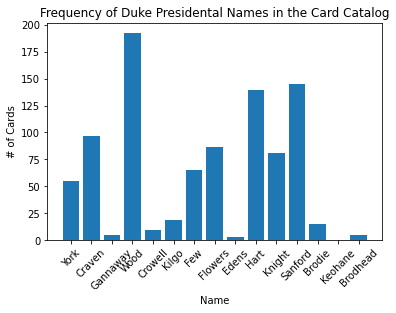

In [8]:
president_counts = {
    'York': 55, 
    'Craven': 97, 
    'Gannaway': 5, 
    'Wood': 192, 
    'Crowell': 10, 
    'Kilgo': 19, 
    'Few': 65, 
    'Flowers': 87, 
    'Edens': 3, 
    'Hart': 139, 
    'Knight': 81, 
    'Sanford': 145, 
    'Brodie': 15, 
    'Keohane': 0, 
    'Brodhead': 5
}

# Display bar chart of gender frequencies
plt.bar(*zip(*president_counts.items()))
plt.xticks(rotation = 45)
plt.title("Frequency of Duke Presidental Names in the Card Catalog")
plt.xlabel("Name")
plt.ylabel("# of Cards")
plt.show()